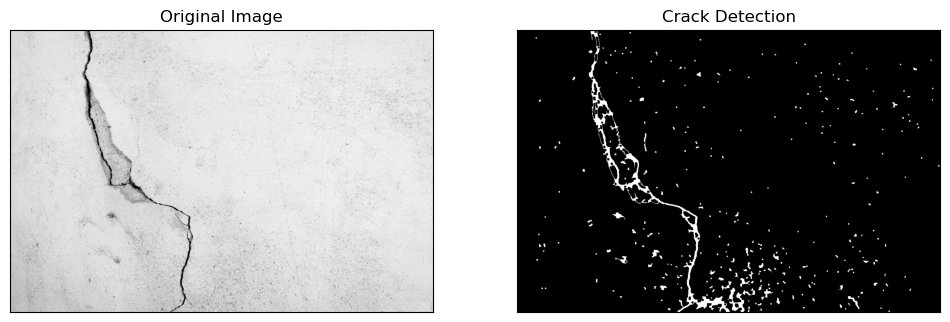

Repair is needed.


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_cracks(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Image not loaded. Please check the image path.")
        return None

    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Canny edge detector
    edges = cv2.Canny(blurred, 50, 150)

    # Perform morphological operations to enhance features
    kernel = np.ones((5, 5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    eroded_edges = cv2.erode(dilated_edges, kernel, iterations=1)

    return eroded_edges, image  # Return the processed image and the original image

def repair_decision(crack_image, threshold_area=5000):
    # Find contours in the image
    contours, _ = cv2.findContours(crack_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate total crack area
    total_crack_area = 0
    for contour in contours:
        total_crack_area += cv2.contourArea(contour)

    # Decide whether repair is needed based on the threshold
    repair_needed = total_crack_area > threshold_area

    return repair_needed

if __name__ == "__main__":
    # Specify the path to the input image
    input_image_path = 'wallcrack2.jpg'

    # Run the crack detection function
    result, original_image = detect_cracks(input_image_path)

    if result is not None:
        # Determine repair decision
        repair_needed = repair_decision(result)

        # Display the original image and the processed result using Matplotlib
        plt.figure(figsize=(12, 6))
        plt.subplot(121), plt.imshow(original_image, cmap='gray')
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(122), plt.imshow(result, cmap='gray')
        plt.title('Crack Detection'), plt.xticks([]), plt.yticks([])
        plt.show()

        if repair_needed:
            print("Repair is needed.")
        else:
            print("No repair needed.")
